## 4- Parameter estimation (`estimation.py` module).

The `estimation.py` module combines ODE solving with the DE (differential evolution) genetic optimizer.

In [1]:
%matplotlib inline
import matplotlib as mpl
import stimator

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(9.0,5.0)    #(6.0,4.0)
mpl.rcParams['font.size']=14                #10 
mpl.rcParams['savefig.dpi']=100             #72 

###  4.1. Example: glyoxalase system

An example with **two time courses**


title Glyoxalase system in L. Infantum

glx1 : HTA -> SDLTSH, V1*HTA/(Km1 + HTA)
glx2 : SDLTSH ->,     V2*SDLTSH/(Km2 + SDLTSH)

find V1  in [0.00001, 0.0001]
find Km1 in [0.01, 1]
find V2  in [0.00001, 0.0001]
find Km2 in [0.01, 1]

init : SDLTSH = 7.69231E-05, HTA = 0.1357

-- reading time courses -------------------------------
file C:\Users\tonho\Desktop\stgit\doc\tutorial\TSH2a.txt:
244 time points, 1 variables
file C:\Users\tonho\Desktop\stgit\doc\tutorial\TSH2b.txt:
347 time points, 2 variables

Solving Glyoxalase system in L. Infantum...
0   : 0.001590
1   : 0.001590
2   : 0.000133
3   : 0.000133
4   : 0.000133
5   : 0.000133
6   : 0.000133
7   : 0.000133
8   : 0.000133
9   : 0.000133
10  : 0.000133
11  : 0.000133
12  : 0.000133
13  : 0.000133
14  : 0.000133
15  : 0.000133
16  : 0.000133
17  : 0.000133
18  : 0.000133
19  : 0.000133
20  : 0.000133
21  : 0.000133
22  : 0.000133
refining last solution ...

Done!
Too many generations with no improvement in 23 generations.
best sco

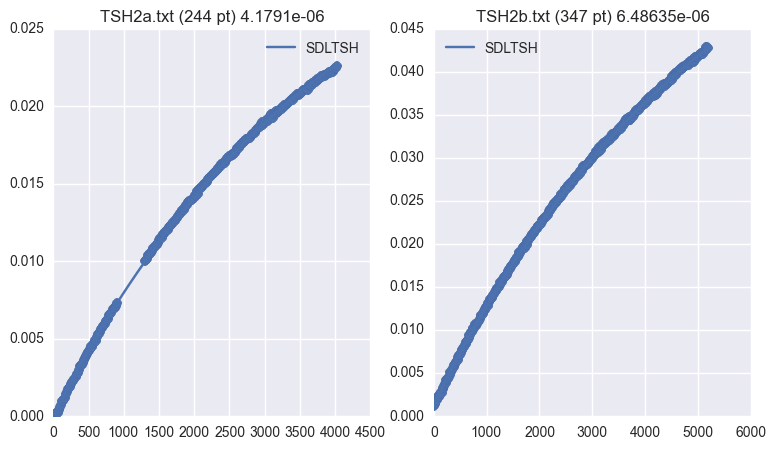

In [2]:
mdl = """
title Glyoxalase system in L. Infantum

glx1 : HTA -> SDLTSH, V1*HTA/(Km1 + HTA)
glx2 : SDLTSH ->,     V2*SDLTSH/(Km2 + SDLTSH)

find V1  in [0.00001, 0.0001]
find Km1 in [0.01, 1]
find V2  in [0.00001, 0.0001]
find Km2 in [0.01, 1]

init : SDLTSH = 7.69231E-05, HTA = 0.1357
"""
m1 = stimator.read_model(mdl)
print mdl

best = m1.estimate(['TSH2a.txt', 'TSH2b.txt'], names=['SDLTSH', 'HTA'])

print best.info()
best.plot()
## #save predicted timecourses to files
## redsols = solver.optimum.optimum_tcs
## redsols.saveTimeCoursesTo(['TSH2a_pred.txt', 'TSH2b_pred.txt'], verbose=True)

-----------

An example with an **unknown initial value**

-- reading time courses -------------------------------
file C:\Users\tonho\Desktop\stgit\doc\tutorial\TSH2a.txt:
244 time points, 1 variables

Solving Glyoxalase system in L. Infantum...
0   : 0.000146
1   : 0.000146
2   : 0.000025
3   : 0.000025
4   : 0.000025
5   : 0.000021
6   : 0.000021
7   : 0.000021
8   : 0.000021
9   : 0.000021
10  : 0.000021
11  : 0.000021
12  : 0.000021
13  : 0.000021
14  : 0.000021
15  : 0.000008
16  : 0.000008
17  : 0.000008
18  : 0.000008
19  : 0.000008
20  : 0.000008
21  : 0.000008
22  : 0.000008
23  : 0.000008
24  : 0.000008
25  : 0.000008
26  : 0.000008
27  : 0.000008
28  : 0.000008
29  : 0.000008
30  : 0.000008
31  : 0.000008
32  : 0.000008
33  : 0.000008
34  : 0.000008
35  : 0.000008
refining last solution ...

Done!
Too many generations with no improvement in 36 generations.
best score = 0.000003
best solution: [  3.36574664e-05   1.87056447e-05   9.25226437e-02]
Optimization took 1.898 s (00m 01.898s)

--- PARAMETERS           ----------------------

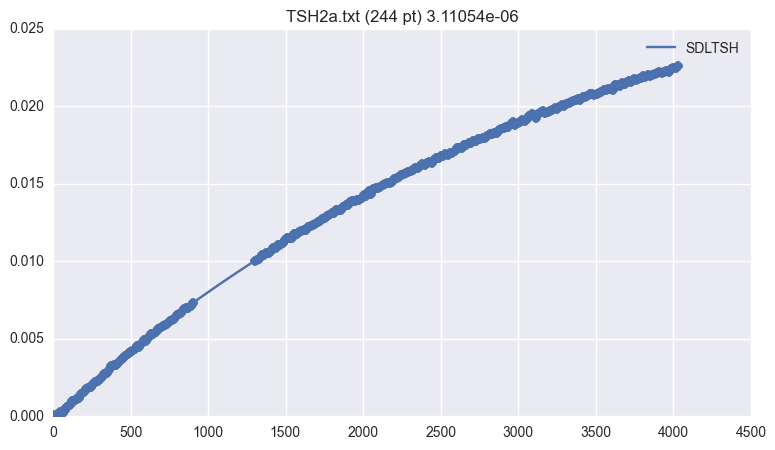

In [3]:
m2 = m1.copy()

# Assume init.HTA is uncertain
m2.init.HTA.set_bounds((0.05,0.25))

# do not estimate Km1 and Km2, just to help the analysis
m2.parameters.Km1.set_bounds(None)
m2.parameters.Km2.set_bounds(None)
m2.parameters.Km1 = 0.252531
m2.parameters.Km2 = 0.0980973


# VERY IMPORTANT:
# only one time course can be used: 
# cannot fit one initial value using several timecourses!

best = m2.estimate(['TSH2a.txt'], names=['SDLTSH', 'HTA'], opt_settings=dict(pop_size=60))

print best.info()
best.plot()